# Decision Tree Algo

Each block in this algo is defined and implemeted in the helper function

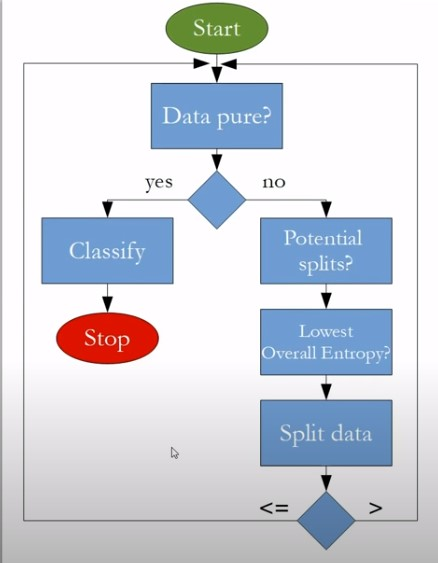

In [78]:
import pandas as pd
import numpy as np
hostel_df = pd.read_csv('class_distribution.csv')
hostel_df.dtypes
hostel_df['Gender'] = hostel_df['Gender'].map({'M':0,'F':1})
#train['Stay in hostel'] = train['Stay in hostel'].map({'Yes':0,'':1})
hostel_df

,Class,Gender,Stay in hostel
0,9,0,Yes
1,10,1,No
2,8,1,Yes
3,8,1,No
4,9,0,Yes
5,10,0,No
6,11,1,Yes
7,11,0,Yes
8,8,1,Yes
9,9,0,No


In [79]:
train_array = train.values
train_array

NameError: name 'train' is not defined

In [30]:
train_array[:,0]

array([ 9, 10,  8,  8,  9, 10, 11, 11,  8,  9, 11, 11, 10, 10],
      dtype=int64)

In [28]:
hist_class = np.bincount(train_array[:,0])
hist

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 4, 4], dtype=int64)

In [35]:
hist_target = np.bincount(train_array[:,2])
hist_target

array([8, 6], dtype=int64)

In [32]:
ps = hist/len(train_array[:,0])
ps

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.21428571, 0.21428571,
       0.28571429, 0.28571429])

In [34]:
entropy  = -np.sum([p*np.log2(p) for p in ps if p!=0])
entropy 

1.9852281360342512

# Import Statements

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
#to display the tree in a readable format - import pprint
from pprint import pprint

In [81]:
#loading dataset
df = pd.read_csv('Iris.csv')
df = df.drop('Id', axis=1)
df = df.rename(columns = {'Species':'Label'})
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
#checking if null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Label          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Train Test Split from Scratch

In [83]:
#some of methods used 
df.index # this returns a RangeIndex Object, so we have to convert to list to use it
indices = df.index.tolist()
#select a random sample from the indices list using:
test_indices  = random.sample(population = indices, k = 20) # here population is the entire list from where 
#the ramdom sample will be selected of size K
# we will now have to use a df.loc[test_indices] and pass the test_indices in the loc function to get the test df

# in order to get the train_df we will have to drop the rows with test_indices

In [84]:
def train_test_split(df,test_size):
#The isinstance() function returns True if the specified object is of the specified type, otherwise False. 
#here checking if test_size is in float
#if float then it would mean that the percentage is an input, otherwise if an int we will 
#know its the number of rows one wants as a test size
    if isinstance(test_size, float):
        test_size = round(test_size*len(df))
    indices = df.index.tolist()
    test_indices  = random.sample(population = indices, k = test_size)
    test_df = df.loc[test_indices,:]
    train_df = df.drop(test_indices, axis=0)
    return train_df, test_df

In [85]:
#testing the helper function
#to get the same random sample generated
random.seed(0)
train_df, test_df = train_test_split(df,test_size=20)
print(f'length of test_df:{test_df.shape}')
print(f'length of train_df:{train_df.shape}')

length of test_df:(20, 5)
length of train_df:(130, 5)


In [86]:
test_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
98,5.1,2.5,3.0,1.1,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica


In [87]:
#in order to have the algo run faster we have to run on numpy
data = train_df.values
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

# Data Pure?

Helper function to check if a data partition has one or more classes

In [88]:
label_column = data[:,-1]
np.unique(label_column, return_counts = True) [1].argmax()

0

In [89]:
def check_purity(data):
    label_column = data[:,-1]
    unique_classes = np.unique(label_column)
    if len(unique_classes)==1:
        return True
    else:
        return False

In [90]:
#testing the helper function
check_purity(train_df.values)

False

In [91]:
check_purity(train_df[train_df['PetalWidthCm']<0.8].values)

True

# Classify 

Helper function to clasify an observation based on the index of the majority class

In [92]:
label_column = data[:,-1]
# np.unique() has another argument called return_counts of each of the classes
unique_classes, counts_unique_classes = np.unique(label_column, return_counts = True) 
# returns: (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
#array([46, 42, 42], dtype=int64))
#argmax method returns the index of the class with maximum count from the above
index = counts_unique_classes.argmax()
unique_classes[index]

'Iris-setosa'

In [93]:
def classify(data):
    label_column = data[:,-1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts = True)
    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    return classification

In [94]:
#testing the helper function -  also only works on numpy
classify(train_df[train_df['PetalWidthCm']<0.8].values)

'Iris-setosa'

In [95]:
classify(train_df[train_df['PetalWidthCm']<1.2].values)

'Iris-setosa'

In [96]:
classify(train_df[train_df['PetalWidthCm']>1.2].values)

'Iris-virginica'

In [97]:
classify(train_df[(train_df['PetalWidthCm']>.8) & (train_df['PetalWidthCm']<1.2)].values)

'Iris-versicolor'

# Potential splits?

helper function to get potential splits of each feature and return a dictionary. The split will occur in a sorted column at the (i+1)+i/2 th index as we loop over the values of each feature

In [98]:
def get_potential_splits(data):
    potential_splits = {}
    n_sample,n_columns = data.shape
    #columns - 1 becausse we dont want to consider the labels
    for column_index in range(n_columns-1):
    # for each column there will be a potential splits list
        potential_splits[column_index] = []
        #listing all the values of that column/feature
        values = data[:,column_index]
        #this gives trhe list of sorted unique values of each feature
        unique_values = np.unique(values)
        for index in range(len(unique_values)):
            if index!=0:
                curr_value = unique_values[index]
                prev_value = unique_values[index-1]
                potential_split_values = (curr_value + prev_value)/2
                #appending the potential split in the potential splits list for each column
                potential_splits[column_index].append(potential_split_values)
    return potential_splits

In [99]:
# testing the helper function 
potential_splits = get_potential_splits(train_df.values)
potential_splits

{0: [4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.15,
  6.25,
  6.35,
  6.45,
  6.55,
  6.65,
  6.75,
  6.85,
  6.95,
  7.05,
  7.15,
  7.4,
  7.65,
  7.800000000000001],
 1: [2.1,
  2.25,
  2.3499999999999996,
  2.45,
  2.55,
  2.6500000000000004,
  2.75,
  2.8499999999999996,
  2.95,
  3.05,
  3.1500000000000004,
  3.25,
  3.3499999999999996,
  3.45,
  3.55,
  3.6500000000000004,
  3.75,
  3.8499999999999996,
  3.95,
  4.05,
  4.15,
  4.300000000000001],
 2: [1.05,
  1.15,
  1.25,
  1.35,
  1.45,
  1.55,
  1.65,
  1.7999999999999998,
  2.5999999999999996,
  3.4,
  3.6,
  3.75,
  3.8499999999999996,
  3.95,
  4.05,
  4.15,
  4.25,
  4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.25,
  6.5,
  6.65,
  6.800000000000001],
 3: [0.15000000000000002,
  0.25,
  0.35,
  0.45,
  0.55,
  0.8,
  1.0

C:\Users\ayonh\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


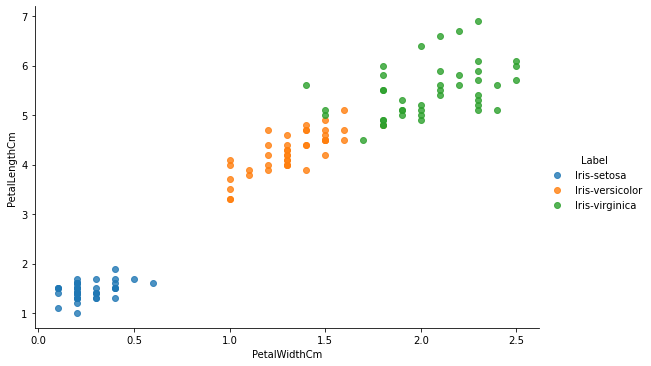

In [100]:
#check if the potential splits makes any sense
#we dont want the best fit line so setting fit_reg = false
sns.lmplot(data = train_df, x = "PetalWidthCm", y = "PetalLengthCm",hue = 'Label',fit_reg = False, size = 5, aspect = 1.5)

C:\Users\ayonh\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


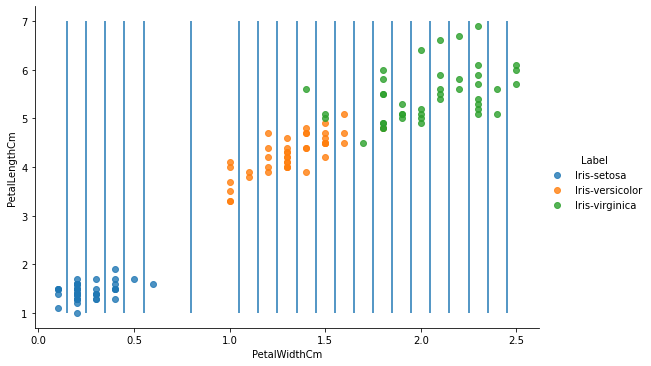

In [101]:
#plotting potential spplits on vertical line
#potential splits for petal width
sns.lmplot(data = train_df, x = "PetalWidthCm", y = "PetalLengthCm",hue = 'Label',fit_reg = False, size = 5, aspect = 1.5)
plt.vlines(potential_splits[3], ymin = 1, ymax=7)

C:\Users\ayonh\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


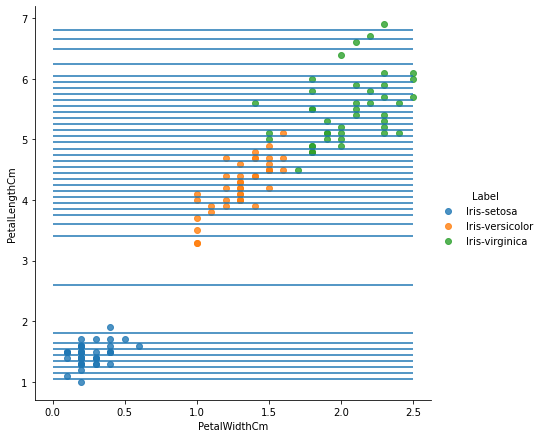

In [102]:
#potential splits for petal width
sns.lmplot(data = train_df, x = "PetalWidthCm", y = "PetalLengthCm",hue = 'Label',fit_reg = False, size = 6, aspect = 1)
plt.hlines(potential_splits[2], xmin = 0, xmax=2.5)

# Split Data

helper function to split data in a respective column on a split value

https://www.youtube.com/watch?v=Ud5XlhG8-gU&list=PLPOTBrypY74xS3WD0G_uzqPjCQfU6IRK-&index=4

In [103]:
def split_data(data, split_column, split_value):
    #lets say our split column is PetalWidthCm. auto pick up rows from the array train_df.value that are below the split_value
    #split_column = 3
    #split_value = 0.8
    #values of the split column
    split_column_values = data[:,split_column]
    #partitioning the data based on the split value - boolean mask
    split_column_values <=split_value
    #the below result gives only the data below
    data_below = data[split_column_values <=split_value]
    data_above = data[split_column_values > split_value]
    return data_below, data_above

In [104]:
#testiung the helper function
split_value = 0.8
split_column = 3
data_below, data_above = split_data(data, split_column, split_value)

C:\Users\ayonh\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


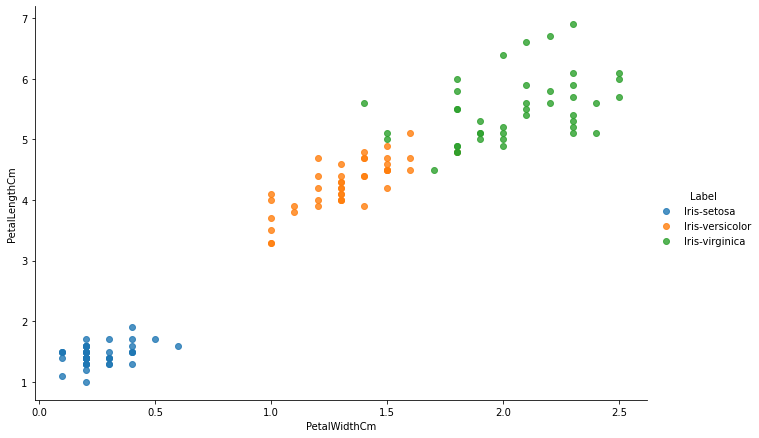

In [105]:
#lmplot only takes dataframe
#so converting the array to dataframe
plotting_df = pd.DataFrame(data, columns = df.columns)

sns.lmplot(data = plotting_df, x = "PetalWidthCm", y = "PetalLengthCm",hue = 'Label',fit_reg = False, size = 6, aspect = 1.5)

C:\Users\ayonh\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


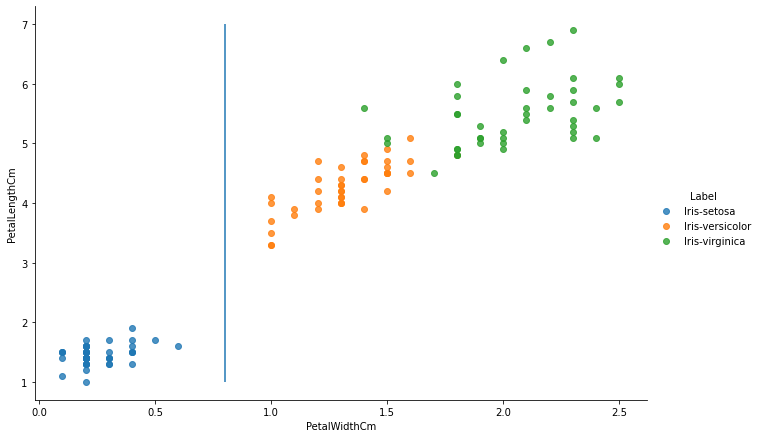

In [106]:
#plotting the splitline
split_value = 0.8
plotting_df = pd.DataFrame(data, columns = df.columns)
sns.lmplot(data = plotting_df, x = "PetalWidthCm", y = "PetalLengthCm",hue = 'Label',fit_reg = False, size = 6, aspect = 1.5)
plt.vlines(x = split_value,ymin = 1, ymax=7)

C:\Users\ayonh\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


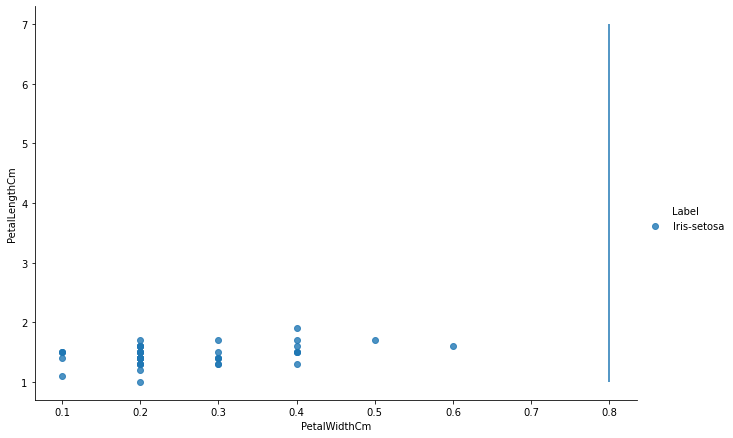

In [107]:
#plotting the splitline -- see now the right side of 0.8 is gone
split_value = 0.8
plotting_df = pd.DataFrame(data_below, columns = df.columns)
sns.lmplot(data = plotting_df, x = "PetalWidthCm", y = "PetalLengthCm",hue = 'Label',fit_reg = False, size = 6, aspect = 1.5)
plt.vlines(x = split_value,ymin = 1, ymax=7)

C:\Users\ayonh\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.0, 2.6)

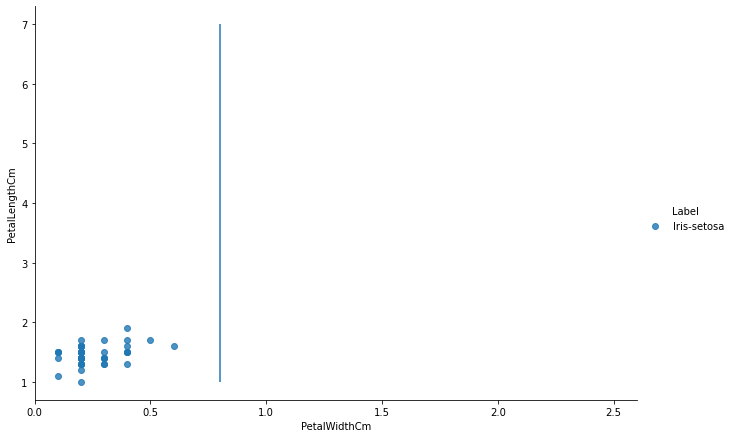

In [108]:
# or for a better view freeze the x axis to the highest value of petal width that is 2.6 as given in previous plots
split_value = 0.8
plotting_df = pd.DataFrame(data_below, columns = df.columns)
sns.lmplot(data = plotting_df, x = "PetalWidthCm", y = "PetalLengthCm",hue = 'Label',fit_reg = False, size = 6, aspect = 1.5)
plt.vlines(x = split_value,ymin = 1, ymax=7)
plt.xlim(0,2.6)

C:\Users\ayonh\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.0, 2.6)

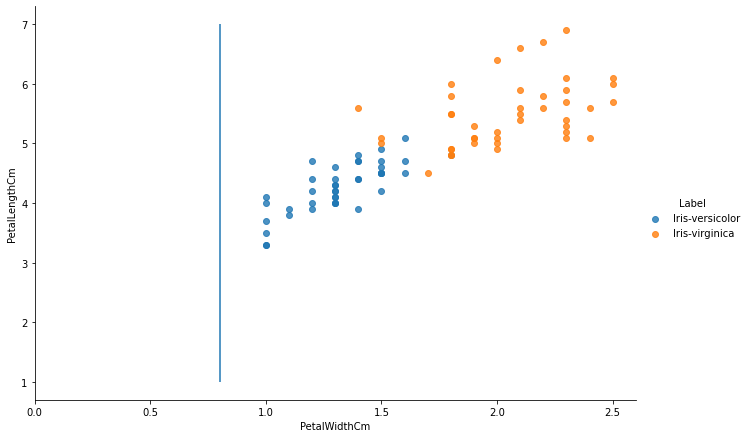

In [109]:
#for data above
split_value = 0.8
plotting_df = pd.DataFrame(data_above, columns = df.columns)
sns.lmplot(data = plotting_df, x = "PetalWidthCm", y = "PetalLengthCm",hue = 'Label',fit_reg = False, size = 6, aspect = 1.5)
plt.vlines(x = split_value,ymin = 1, ymax=7)
plt.xlim(0,2.6)

# Calculate Entropy of one side of the split on a specifc column/feature

this function calculates the entropy for one side of the split resulting from what was returned from the split data

In [110]:
label_column = data[:,-1]
labels, counts = np.unique(label_column, return_counts = True)
labels, counts

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([46, 42, 42], dtype=int64))

In [111]:
counts

array([46, 42, 42], dtype=int64)

In [112]:
probabilities = counts/counts.sum()
probabilities

array([0.35384615, 0.32307692, 0.32307692])

In [113]:
probabilities*np.log2(probabilities)

array([-0.53034669, -0.52663166, -0.52663166])

In [114]:
probabilities*-np.log2(probabilities)

array([0.53034669, 0.52663166, 0.52663166])

In [115]:
sum(probabilities*-np.log2(probabilities))

1.5836100169358511

In [116]:
def calculate_entropy(data):
    label_column = data[:,-1]
    labels, counts = np.unique(label_column, return_counts = True)
    #counts/counts.sum() returns array([0.35384615, 0.32307692, 0.32307692])
    probabilities = counts/counts.sum()
    #this takes care of element wise (first element * first element and so on opertaion of each element of numpy array of probablities
    entropy = sum(probabilities*-np.log2(probabilities))
    return entropy

In [117]:
#testiung the helper function
calculate_entropy(data_below)

0.0

In [118]:
#testiung the helper function
calculate_entropy(data_above)

1.0

In [119]:
#testiung the helper function
split_value = 3
split_column = 2
data_below, data_above = split_data(data, split_column, split_value)
calculate_entropy(data_above)

1.0

# Lowest overall entropy

Calculate the overall/total entropy of a feature based on a split using calculate_entropy to sum up the entropy of each side of the split 

In [120]:
def calculate_overall_entropy(data_below, data_above):
    n_data_points = len(data_below)+len(data_above)
    p_data_below = len(data_below)/n_data_points
    p_data_above = len(data_above)/n_data_points
    overall_entropy = p_data_below*calculate_entropy(data_below) + p_data_above*calculate_entropy(data_above)
    return overall_entropy

In [121]:
#testing the helper function
split_value = 1.05
split_column = 3
data_below, data_above = split_data(data, split_column, split_value)
calculate_overall_entropy(data_below, data_above)

0.8038152432539343

# Find the best split

Helper function to find the split from the list of potential splits (result from get_potential_splits function) across all features for which the overall entropy will be lowest. Returns the best split column and the best split value

In [124]:
# take a random_value of total entropy as 999
# we will calculate the overall_entropy from each split from each of the potential splits list 
#from each key because porettnial splits is a dictionary
# we will return the best column and the best split that has the lowest overall entropy
def determine_best_split(data,potential_splits_dict):
    total_entropy = 999
    #accessing each key of the potential_list dic
    for column_index in potential_splits:
    #accessing each splits for the current key
           for value in potential_splits_dict[column_index]:
                data_below, data_above = split_data(data, split_column = column_index, split_value = value)
                current_overall_entropy = calculate_overall_entropy(data_below, data_above)
    #we are reducing the total_entropy in each loop for each split            
                if current_overall_entropy<=total_entropy:
                    total_entropy = current_overall_entropy
                    print(f'total_entropy  {total_entropy}')
                    print('--------------------')
                    best_split_column = column_index
                    best_split_value = value
                else:
                    print(f'entropy_bigger: {current_overall_entropy}')
                    print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
    
    
    return best_split_column, best_split_value

In [125]:
#testing the helper function
potential_splits_dict = potential_splits
determine_best_split(data,potential_splits_dict)
# returns column 3rd as in oetal width and split value iof 0.8

total_entropy  1.5720020238565273
--------------------
total_entropy  1.5361944237758898
--------------------
total_entropy  1.5239133836923353
--------------------
total_entropy  1.4729077974502993
--------------------
total_entropy  1.4461826517473506
--------------------
total_entropy  1.3899738978707246
--------------------
entropy_bigger: 1.4108021397169417
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
total_entropy  1.3421579366675092
--------------------
total_entropy  1.1982739650732486
--------------------
total_entropy  1.1506342218796637
--------------------
total_entropy  1.1272872073487727
--------------------
total_entropy  1.0377356074985853
--------------------
total_entropy  1.035717161892085
--------------------
entropy_bigger: 1.0926841298220284
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
entropy_bigger: 1.0669201217951003
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
entropy_bigger: 1.1018808662889912
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
entropy_bigger: 1.108797437031160

(3, 0.8)

# Decision Tree Algorithm

Example of a Tree: circled is subtree

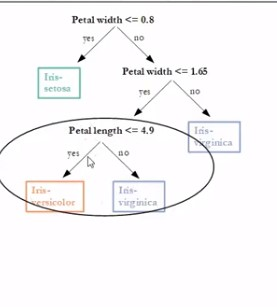

we can represent the above tree structure with a dictionary like below

In [46]:
example_tree = {"PetalWidthCm <=0.8":
                    ["Iris-versicolor",{"PetalWidthCm <=1.65":
                                        [{"PetalLengthCm <=4.9":["Iris-versicolor","Iris-virginica"]},"Iris-virginica"]}]}

so the framework of a node will be in dictionary

sub_tree = {question:[yes_answer,no_answer]}

# Algorithm

First Basic version of the Algo

This algo will take in a dataframe unlike the helper function which onky takes in array. So we will take in a dataframe and convert into a helper function. 

This will be a recursive algo. We will set a counter for this algo. For the first run - counter =0 - we will convert the dataframe to numpy array. From the second run - counter =1 - we will use this function/ algo with the converted numpy array

Hence forward we will use 
check for purity of data
get_potential_splits(data) ---> results in dictionary
determine_best_split(data,potential_splits_dict)
calculate_overall_entropy(data_below, data_above)
split_data(data, split_column, split_value)

This


In [72]:
def decision_tree_algo_ver_0(df, counter = 0):
    #first counter convert to numpy
    if counter == 0 :
        data = df.values
    #once df is converted to numpy in all future recursions the numpy array will be used, named as df    
    else:
        data = df
        
    #check for purity
    if check_purity(data):
        classification = classify(data)
        return classification
        
    else:
        counter += 1
        #getting the first list of potential splits
        
        potential_splits_dict = get_potential_splits(data)
        split_column, split_value = determine_best_split(data,potential_splits_dict)
        data_below, data_above = split_data(data, split_column, split_value)
        
        #instantiate a subtree node
        
        question = f'{split_column} <= {split_value}'
        subtree = {question:[]}
        # recursive use of the algo
        yes_answer = decision_tree_algo_ver_0(data_below, counter)
        no_answer = decision_tree_algo_ver_0(data_above, counter)
        
        subtree[question].append(yes_answer)
        subtree[question].append(no_answer)
        
        return subtree
# the more the subtrees you want the more the algo and these helper functions will have to be added down    

In [73]:
decision_tree_algo_ver_0(train_df)

{'3 <= 0.8': ['Iris-setosa',
  {'3 <= 1.65': [{'2 <= 4.95': ['Iris-versicolor',
      {'3 <= 1.55': ['Iris-virginica', 'Iris-versicolor']}]},
    {'2 <= 4.85': [{'1 <= 3.1': ['Iris-virginica', 'Iris-versicolor']},
      'Iris-virginica']}]}]}

In [74]:
# pretty print
pprint(decision_tree_algo_ver_0(train_df))

{'3 <= 0.8': ['Iris-setosa',
              {'3 <= 1.65': [{'2 <= 4.95': ['Iris-versicolor',
                                            {'3 <= 1.55': ['Iris-virginica',
                                                           'Iris-versicolor']}]},
                             {'2 <= 4.85': [{'1 <= 3.1': ['Iris-virginica',
                                                          'Iris-versicolor']},
                                            'Iris-virginica']}]}]}


# Prunning the Tree
Second version of the Algo: decision_tree_algo_ver_1

2 changes:
    1) instead of column index we give the column name/feature name in the tree by declaring global variable column_headers
    
    2) if the sample size is more than 2 or 5 points (2 because this will be the minimum sample size to split) then we follow the tree. If less than 2 then classify. For that we are adding another variable called min_sample in the algo. the more the min sample size the smaller the tree. This is also called prunning a tree to specify how many layers/ or depth or subtree we want
    
    3) we will add another parameter called max_depth for prunning the tree by setting the counter == max depth
    
    4) if we give max_depth as 3 the problem occurs in the last layer -- 'PetalLengthCm <= 4.85': ['Iris-virginica',
                                                                              'Iris-virginica']
    
    {'PetalWidthCm <= 0.8': ['Iris-setosa',
                         {'PetalWidthCm <= 1.65': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
                                                                              'Iris-virginica']},
                                                   {'PetalLengthCm <= 4.85': ['Iris-virginica',
                                                                              'Iris-virginica']}]}]}
    Both yes_ansser and no_answer is Iris-virginica. what happened here is: The data at this point is not pure yet so the algo       decided to make another split but the max depth was already reached so it went ahead to classify the data remaining at this     depth. Since the classification result was to return the majority class value it returned the same Iris-virginica for yes       and No.  We want to avoid this error by putting a conditioon if yes_anser == no_answer then print Iris-virginica without         appending to the list

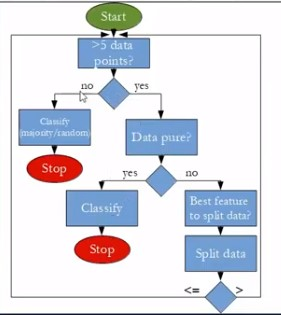

In [50]:
def decision_tree_algo_ver_1(df, counter = 0, min_samples = 2, max_depth = 5):
    #first counter convert to numpy and also store the column names
    
    if counter == 0 :
        #declaring global will alow column headers to be present in every recursions
        #without declaring this as global variable the tree will be able to fetch the column header
        #values when counter increases in next recursions and will throw local variable error
        global column_headers
        column_headers = df.columns
        data = df.values
        
    #once df is converted to numpy in all future recursions the numpy array will be used, named as df    
    else:
        data = df
        
    #check for purity - this is the base case or if we see the min_sample_size is<2 then no need to split
    if  (check_purity(data)) or (len(data)<min_samples) or (counter == max_depth):
        classification = classify(data)
        return classification
        
    else:
        counter += 1
        #getting the first list of potential splits
        
        potential_splits_dict = get_potential_splits(data)
        split_column, split_value = determine_best_split(data,potential_splits_dict)
        data_below, data_above = split_data(data, split_column, split_value)
        
        #instantiate a subtree node
        #feature_name maps to the column name when we get the column index as the split column value
        feature_name = column_headers[split_column]
        question = f'{feature_name} <= {split_value}'
        subtree = {question:[]}
        # recursive use of the algo
        yes_answer = decision_tree_algo_ver_1(data_below, counter,min_samples,max_depth)
        no_answer = decision_tree_algo_ver_1(data_above, counter,min_samples,max_depth)
        if yes_answer == no_answer:
            subtree = yes_answer
        
        else:        
            subtree[question].append(yes_answer)
            subtree[question].append(no_answer)
        
        return subtree
# the more the subtrees you want the more the algo and these helper functions will have to be added down    

In [51]:
# pretty print - testing the algo with various min_sample size. the more the min sample size the smaller the tree.
pprint(decision_tree_algo_ver_1(train_df,min_samples=20))

{'PetalWidthCm <= 0.8': ['Iris-setosa',
                         {'PetalWidthCm <= 1.65': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
                                                                              'Iris-virginica']},
                                                   'Iris-virginica']}]}


In [52]:
## pretty print - testing the algo with max_depth parameter. we will see specifying the max depth size as 2 will give tree size 2

pprint(decision_tree_algo_ver_1(train_df,max_depth = 3))

{'PetalWidthCm <= 0.8': ['Iris-setosa',
                         {'PetalWidthCm <= 1.65': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
                                                                              'Iris-virginica']},
                                                   'Iris-virginica']}]}


# Classification of unknown dataset - single observation prediction

1) save the tree we built

2) we will have to parse the feature data points from the observation

3) we will have to parse the tree and with if else we have to check if our feature data satisfies the first nods of the tree
   For example: question: if petal_width<0.8, --> if yes: Iris-setosa, if no: - recurse to next node -- if petal_width<1.65, we    will check if its a class or another question. we keep doing that until the node is not a dictionary any more

4) if it doesnt then we will run the classify function recursively to travel to the next node and so on till the point the tree node is not a dictionary any more

5) we divide the function into base case and recursion. base case is to find if the answer to the question is a class. Base applies applies when the answer is not a dictionary. 

5) The recursive case will run if the answer is a dictionary

In [53]:
tree = decision_tree_algo_ver_1(train_df,max_depth = 3)
tree

{'PetalWidthCm <= 0.8': ['Iris-setosa',
  {'PetalWidthCm <= 1.65': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
      'Iris-virginica']},
    'Iris-virginica']}]}

In [54]:
to_pred = test_df.iloc[0]
to_pred

SepalLengthCm                5.1
SepalWidthCm                 2.5
PetalLengthCm                  3
PetalWidthCm                 1.1
Label            Iris-versicolor
Name: 98, dtype: object

In [55]:
to_pred['PetalWidthCm']

1.1

In [56]:
to_pred['PetalWidthCm']<=0.8

False

In [57]:
tree.keys()

dict_keys(['PetalWidthCm <= 0.8'])

In [58]:
tree[question]

NameError: name 'question' is not defined

In [59]:
tree[question][0]

NameError: name 'question' is not defined

In [60]:
tree[question][1]

NameError: name 'question' is not defined

transform the dic_keys object to a string by first converting it to a list

In [61]:
list(tree.keys())

['PetalWidthCm <= 0.8']

In [62]:
list(tree.keys())[0]

'PetalWidthCm <= 0.8'

In [63]:
question = list(tree.keys())[0]

In [64]:
question.split()

['PetalWidthCm', '<=', '0.8']

Reference of the node structure we used to build the tree: sub_tree = {question:[yes_answer,no_answer]}

In [65]:
def classify_pred(to_pred, tree):
    question = list(tree.keys())[0]
    #extracting each element of the list and storing them in variables
    feature_name, comparision_operator, value = question.split()
    if to_pred[feature_name] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]
        
    #base case is our answer if not a dictionary

    if not isinstance(answer,dict):
        return answer
    else:
    #residual tree is tree[question][1] and tree[question][2] based on max depth
        residual_tree = answer
        return classify_pred(to_pred, residual_tree)

In [66]:
#testing the algo
classify_pred(to_pred, tree)

'Iris-versicolor'

In [67]:
to_pred = test_df.iloc[5]
to_pred

SepalLengthCm               6.7
SepalWidthCm                3.3
PetalLengthCm               5.7
PetalWidthCm                2.1
Label            Iris-virginica
Name: 124, dtype: object

In [68]:
#testing the algo
classify_pred(to_pred, tree)

'Iris-virginica'

# Classification of unknown Batch - and measuring the accuracy

In [69]:
def batch_accuracy(df,tree):
    #add another column = classication to the df - batch passed with the result of the classify_pred
    #do this by apply function across each row and pass the argument tree so the classify_pred can use it
    df['classification'] = df.apply(classify_pred,axis=1, args = (tree,))
    #returns a boolean column - classification_correct of true and false
    df['classification_correct'] = df['classification'] == df['Label']
    accuracy = df.classification_correct.mean()
    return accuracy
    

In [70]:
#testing the batch accuracy by passing the whole test_df
batch_accuracy(test_df,tree)

0.95

In [71]:
# after 2 new columns added
test_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label,classification,classification_correct
98,5.1,2.5,3.0,1.1,Iris-versicolor,Iris-versicolor,True
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica,True
10,5.4,3.7,1.5,0.2,Iris-setosa,Iris-setosa,True
66,5.6,3.0,4.5,1.5,Iris-versicolor,Iris-versicolor,True
130,7.4,2.8,6.1,1.9,Iris-virginica,Iris-virginica,True
124,6.7,3.3,5.7,2.1,Iris-virginica,Iris-virginica,True
103,6.3,2.9,5.6,1.8,Iris-virginica,Iris-virginica,True
77,6.7,3.0,5.0,1.7,Iris-versicolor,Iris-virginica,False
122,7.7,2.8,6.7,2.0,Iris-virginica,Iris-virginica,True
91,6.1,3.0,4.6,1.4,Iris-versicolor,Iris-versicolor,True


In [72]:
# the entire model was built on random seed 0 so now testing with a new combination with random seed
train_df, test_df = train_test_split(df,test_size=20)
tree = decision_tree_algo_ver_1(train_df,max_depth = 3)
accuracy = batch_accuracy(test_df,tree)
print(f'accuracy: {accuracy}')
pprint(tree)

accuracy: 1.0
{'PetalWidthCm <= 0.8': ['Iris-setosa',
                         {'PetalWidthCm <= 1.75': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
                                                                              'Iris-virginica']},
                                                   'Iris-virginica']}]}


# Adjusting the Algo to also handle categorical features

# Using Titanic Data set which has both categorical and continius features

Tweaks that will go to the algo:
    1) For continuous variable we were asking if a split<certain value. But for categorical variable we will ask if a certain is equal to a value
     example if sex == male so we have to make such change in many of the helper functions of the algo.
    2) we will do this by knowing the column from the column headers                                                             
        

In [112]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
df['label'] = df.Survived
df = df.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis = 1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [114]:
#finding missing value columns
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
label         0
dtype: int64

In [115]:
#filling missing values
median_age = df.Age.median()
mode_embarked = df.Embarked.mode()[0]
df = df.fillna({'Age':median_age,'Embarked':mode_embarked})
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
label       0
dtype: int64

In [116]:
df.shape

(891, 8)

In [117]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [118]:
train_df, test_df = train_test_split(df,test_size=0.2)
print(f'length of test_df:{test_df.shape}')
print(f'length of train_df:{train_df.shape}')

length of test_df:(178, 8)
length of train_df:(713, 8)


# Determine Type of Feature
This will be used in all our helper functions to determine whether categorical or continious

In [119]:
def determine_type_of_feature(df):
    feature_types = []
    n_unique_threshold = 15
    for column in df.columns:
        unique_values = df[column].unique()
        example_value = unique_values[0]
            
        if (isinstance(example_value,str)) or (len(unique_values)<=n_unique_threshold):
            feature_types.append('categorical')
        else:
            feature_types.append('continuous')
    return feature_types

In [120]:
#testing the function
feature_types = determine_type_of_feature(df)
i = 0
for col in df.columns:
    print(f'{col}: {feature_types[i]}')
    i+= 1

Pclass: categorical
Sex: categorical
Age: continuous
SibSp: categorical
Parch: categorical
Fare: continuous
Embarked: categorical
label: categorical


# Tweaking the algo to make that distinction of features types
decision_tree_algo_ver_2

In [135]:
def decision_tree_algo_ver_2(df, counter = 0, min_samples = 2, max_depth = 5):
    #first counter convert to numpy and also store the column names
    
    if counter == 0 :
        #declaring global will alow column headers to be present in every recursions
        #without declaring this as global variable the tree will be able to fetch the column header
        #values when counter increases in next recursions and will throw local variable error
        #determining the type of features by calling the fetaure type function and creating it as a global variable
        global column_headers, feature_types
        column_headers = df.columns
        feature_types = determine_type_of_feature(df)
        
        data = df.values
        
    #once df is converted to numpy in all future recursions the numpy array will be used, named as df    
    else:
        data = df
        
    #check for purity - this is the base case or if we see the min_sample_size is<2 then no need to split
    if  (check_purity(data)) or (len(data)<min_samples) or (counter == max_depth):
        classification = classify(data)
        return classification
        
    else:
        counter += 1
        #getting the first list of potential splits
        
        potential_splits_dict = get_potential_splits_ver1(data)
        split_column, split_value = determine_best_split(data,potential_splits_dict)
        data_below, data_above = split_data_ver_1(data, split_column, split_value)
        
        #instantiate a subtree node
        #feature_name maps to the column name when we get the column index as the split column value
        feature_name = column_headers[split_column]
        #checking if the feature is continous or categorical
        type_of_feature = feature_types[split_column]
        if type_of_feature == 'continuous':
            question = f'{feature_name} <= {split_value}'
        else:
            question = f'{feature_name} = {split_value}'
        subtree = {question:[]}
        # recursive use of the algo
        yes_answer = decision_tree_algo_ver_2(data_below, counter,min_samples,max_depth)
        no_answer = decision_tree_algo_ver_2(data_above, counter,min_samples,max_depth)
        if yes_answer == no_answer:
            subtree = yes_answer
        
        else:        
            subtree[question].append(yes_answer)
            subtree[question].append(no_answer)
        
        return subtree
# the more the subtrees you want the more the algo and these helper functions will have to be added down    

# Tweaking split data function to include categorical features

In [136]:
def split_data_ver_1(data, split_column, split_value):
    #lets say our split column is PetalWidthCm. auto pick up rows from the array train_df.value that are below the split_value
    #split_column = 3
    #split_value = 0.8
    #values of the split column
    split_column_values = data[:,split_column]
    #partitioning the data based on the split value - boolean mask
    #split_column_values <=split_value
    #checking if the feature is continous or categorical
    type_of_feature = feature_types[split_column]
    if type_of_feature == 'continuous':
        
    #the below result gives only the data below
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values > split_value]    
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    return data_below, data_above

In [137]:
#testing the above function by splitting sex column with split value male
data_below, data_above =  split_data_ver_1(train_df.values, split_column = 1, split_value = 'male')
np.unique(data_above[:,1])

array(['female'], dtype=object)

In [138]:
np.unique(data_below[:,1])

array(['male'], dtype=object)

# Tweaking get_potential_split data function to include categorical features
initially for continous feature we splitted once after each 2 values 

In [139]:
def get_potential_splits_ver1(data):
    potential_splits = {}
    n_sample,n_columns = data.shape
    #columns - 1 becausse we dont want to consider the labels
    for column_index in range(n_columns-1):
    # for each column there will be a potential splits list
        
        #listing all the values of that column/feature
        values = data[:,column_index]
        #this gives trhe list of sorted unique values of each feature
        unique_values = np.unique(values)
        #checking if the feature is continous or categorical
        type_of_feature = feature_types[column_index]
        if type_of_feature == 'continuous':
                potential_splits[column_index] = []
                for index in range(len(unique_values)):
                    if index!=0:
                        curr_value = unique_values[index]
                        prev_value = unique_values[index-1]
                        potential_split_values = (curr_value + prev_value)/2
                        #appending the potential split in the potential splits list for each column
                        potential_splits[column_index].append(potential_split_values)
        else:
        # if the feature is categorical, the split will be for each unique value
                potential_splits[column_index] = unique_values
            
    return potential_splits

In [140]:
#testing the helper function

get_potential_splits_ver1(train_df.values)

{0: array([1, 2, 3], dtype=object),
 1: array(['female', 'male'], dtype=object),
 2: [0.71,
  0.79,
  0.875,
  0.96,
  1.5,
  2.5,
  3.5,
  4.5,
  5.5,
  6.5,
  7.5,
  8.5,
  10.0,
  11.5,
  12.5,
  13.5,
  14.25,
  14.75,
  15.5,
  16.5,
  17.5,
  18.5,
  19.5,
  20.25,
  20.75,
  21.5,
  22.5,
  23.25,
  23.75,
  24.5,
  25.5,
  26.5,
  27.5,
  28.25,
  28.75,
  29.5,
  30.25,
  30.75,
  31.5,
  32.25,
  32.75,
  33.5,
  34.25,
  34.75,
  35.5,
  36.25,
  36.75,
  37.5,
  38.5,
  39.5,
  40.25,
  40.75,
  41.5,
  42.5,
  43.5,
  44.5,
  45.25,
  45.75,
  46.5,
  47.5,
  48.5,
  49.5,
  50.5,
  51.5,
  52.5,
  53.5,
  54.5,
  55.25,
  55.75,
  56.5,
  57.5,
  58.5,
  59.5,
  60.5,
  61.5,
  62.5,
  63.5,
  64.5,
  67.5,
  70.25,
  70.75,
  72.5,
  77.0],
 3: array([0, 1, 2, 3, 4, 5, 8], dtype=object),
 4: array([0, 1, 2, 3, 4, 5, 6], dtype=object),
 5: [2.00625,
  4.50625,
  5.61875,
  6.3375,
  6.44375,
  6.4729,
  6.6229,
  6.80415,
  6.90415,
  6.9625,
  7.0104,
  7.0479,
  7.05209

In [142]:
#testing the algo till this point
tree = decision_tree_algo_ver_2(train_df, max_depth = 3)
#width parameter of pprint increases the width of the image
pprint(tree, width = 50)

{'Sex = female': [{'Pclass = 2': [{'Age <= 56.0': [1,
                                                   0]},
                                  {'Pclass = 1': [1,
                                                  0]}]},
                  {'Pclass = 1': [{'Age <= 17.5': [1,
                                                   0]},
                                  {'Age <= 13.0': [1,
                                                   0]}]}]}


# changing the classify function

In [143]:
def classify_pred(to_pred, tree):
    question = list(tree.keys())[0]
    #extracting each element of the list and storing them in variables
    feature_name, comparision_operator, value = question.split()
    
    if comparision_operator == '<=':
        if to_pred[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
            
    else:
        if str(to_pred[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]
        
    #base case is our answer if not a dictionary

    if not isinstance(answer,dict):
        return answer
    else:
    #residual tree is tree[question][1] and tree[question][2] based on max depth
        residual_tree = answer
        return classify_pred(to_pred, residual_tree)

In [144]:
to_pred = test_df.iloc[0]

In [145]:
classify_pred(to_pred, tree)

1

In [147]:
#since we named Label as label so changing just that
def batch_accuracy_ver_1(df,tree):
    #add another column = classication to the df - batch passed with the result of the classify_pred
    #do this by apply function across each row and pass the argument tree so the classify_pred can use it
    df['classification'] = df.apply(classify_pred,axis=1, args = (tree,))
    #returns a boolean column - classification_correct of true and false
    df['classification_correct'] = df['classification'] == df['label']
    accuracy = df.classification_correct.mean()
    return accuracy

In [150]:
# the entire model was built on random seed 0 so now testing with a new combination with random seed
train_df, test_df = train_test_split(df,test_size=20)
tree = decision_tree_algo_ver_2(train_df,max_depth = 3)
accuracy = batch_accuracy_ver_1(test_df,tree)
print(f'accuracy: {accuracy}')
pprint(tree, width = 50)

accuracy: 0.75
{'Sex = female': [{'Pclass = 2': [1,
                                  {'Pclass = 1': [1,
                                                  0]}]},
                  {'Age <= 13.0': [1, 0]}]}
